## Multispectral image analysis

### Purpose
Evaluate effectiveness of plain NDVI index in identifying naturally occurring kelp canopies. This does *not* use MESMA (Multiple Endmember Spectral Mixture Analysis).

### Data
Multispectral images from the Landsat 8 satellite. The analyzed area is in northern San Diego County, California (33°21'N 117°33'W). We use the Red band (band 4) and Near InfraRed band (band 5).

### Procedure
We compute the NDVI index for each pixel as:

$NDVI = \frac{IR - Red}{IR + Red}$

Then we highlight in red all pixels with NDVI above a given threshold.

### Results
While most inland vegetation is correctly identified, kelp beds are not.
This suggests that we need more advanced techniques such as Multiple Endmember analysis. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# load images for bands 4 (red) and 5 (infrared)
red_file = "LC08_L1TP_040037_20180418_20180501_01_T1 2/LC08_L1TP_040037_20180418_20180501_01_T1_B4.TIF"
ir_file = "LC08_L1TP_040037_20180418_20180501_01_T1 2/LC08_L1TP_040037_20180418_20180501_01_T1_B5.TIF"
color_file = "LC08_L1TP_040037_20180418_20180501_01_T1.jpg"

red = plt.imread(red_file)
ir = plt.imread(ir_file)
color = plt.imread(color_file)

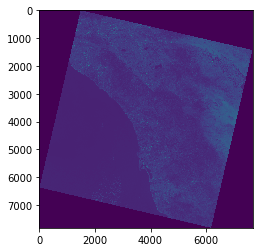

In [3]:
plt.imshow(red)

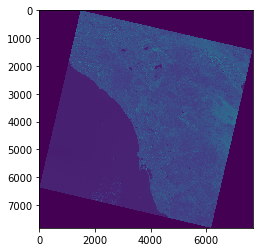

In [4]:
plt.imshow(ir)

In [5]:
# compute NDVI
ir_float = ir.astype(float)
red_float = red.astype(float)
ndvi = np.divide(ir_float - red_float, ir_float + red_float)
ndvi = ndvi > 0.2

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


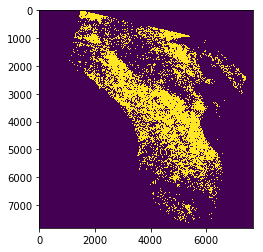

In [6]:
plt.imshow(ndvi)

In [7]:
color2 = np.array(color)
color2[ndvi] = [255,0,0]

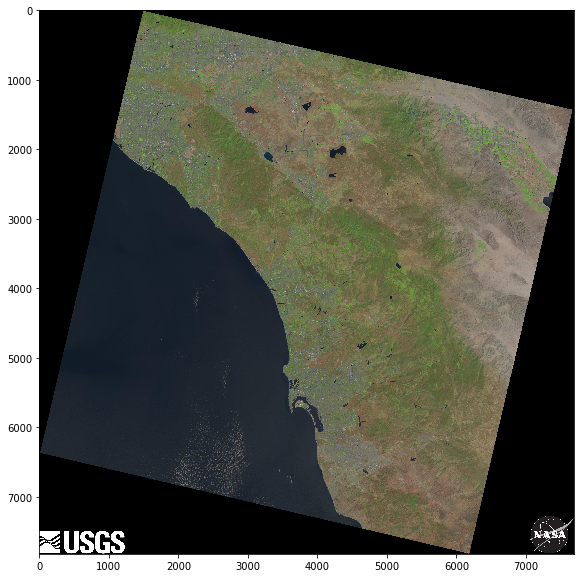

In [8]:
plt.figure(figsize = (10,10))
plt.imshow(color)

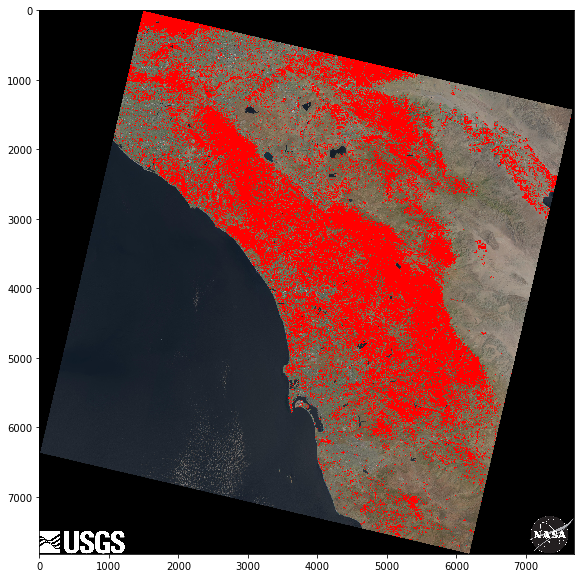

In [124]:
plt.figure(figsize = (10,10))
plt.imshow(color2)

In [ ]:
plt.imsave(arr=color2, fname="out.jpg")